# Hubble constant

Find cosmological parameters with SuperNova Data $\textbf{using several walkers}$

I used the previous program Hobble in the folder Ejercicio_1.

In [1]:
#librerias a usar 
import matplotlib. pyplot as plt
import numpy as np
import random
import scipy
import scipy.special
import math
from scipy.optimize import minimize
import scipy.stats as stats
import time
%matplotlib inline

In [3]:
tb1=np.loadtxt('jla_mub_covmatrix.dat')
tb2=np.loadtxt('jla_mub.txt')

# divido los datos de jla_mub.txt en dos arrelgos z y mu 
z=tb2[:,0]
mu=tb2[:,1]

In [4]:
#arreglo los datos de jla_mud_covmatrix.dat en una matriz de 31x31
covmatrix=[]
for i in range(31):
    row=[]
    for j in range(31):
        row.append(tb1[(31*i)+j])
    covmatrix.append(row)

In [5]:
#Pongo las varianzas de la matriz anterior (que se encuentran en la diagunal) en un arreglo.  
var=[]
for i in range(31):
    var.append(covmatrix[i][i])

In [6]:
def sss(omg):
    return pow((1-omg)/omg,(1/3))

In [7]:
def eta(a,omg):
    r=np.sqrt(pow(sss(omg),3)+1)
    return 2*r*pow((pow(a,-4)-(0.1540*sss(omg)*pow(a,-3))+(0.4304*pow(sss(omg),2)*pow(a,-2))+(0.19097*pow(sss(omg),3)*pow(a,-1))+(0.066941*pow(sss(omg),4))),-1/8)

In [8]:
def D_L(z,omg,H):
    return (299792.458/H)*(1+z)*(eta(1,omg)-eta((1/(1+z)),omg))

In [9]:
def mud(z,omg,H):
    return 25+(5*np.log10(D_L(z,omg,H)))-(5*np.log10(H/100))

In [83]:
def lnlik (z,mu,var, P_ini):
    fp=open('Tabla_datos(2).dat',"w")
    
    #Likelihood con datos iniciales.
    omg0= P_ini[2] #0.4
    H0= P_ini[0] #70.0
    sigma1= P_ini[3] #0.05
    sigma2= P_ini[1] #2
    lk0=0
    
    for k in range(len(z)):
        lk0=lk0+(pow((mu[k]-mud(z[k],omg0,H0)),2)/var[k])
    lk0=-lk0/2.0    
   
    #Likliehood con nuevos doatos.
    for i in range(10000):
        
        omg=np.random.normal(omg0,sigma1)
        H=np.random.normal(H0,sigma2)
        
        if omg>0 and H>0: 
            lki=0 
            for j in range(len(z)):
                lki=lki+(pow((mu[j]-mud(z[j],omg,H)),2)/var[j])
            lki=-lki/2.0   
            if lki>lk0:
                omg0=omg
                H0=H
                lk0=lki
                fp.write("%f  \t%f \n" % (H0,omg0))
            else:
                pro=random.randrange(1,100000000)/100000000
                diff=lki-lk0
                if diff>np.log(pro):
                    omg0=omg
                    H0=H
                    fp.write("%f  \t%f \n" % (H0,omg0))
    fp.close()

How many walkers do you want?: 5

 walker  1
initial parameter of $H_0$: 50
initial parameter of $\sigma_{H_0$}$: 2
initial parameter of $\Omega_0$: 0.1
initial parameter of $\sigma_{\Omega_0}$: 0.05

 walker  2
initial parameter of $H_0$: 60
initial parameter of $\sigma_{H_0$}$: 2
initial parameter of $\Omega_0$: 0.9
initial parameter of $\sigma_{\Omega_0}$: 0.05

 walker  3
initial parameter of $H_0$: 100
initial parameter of $\sigma_{H_0$}$: 2
initial parameter of $\Omega_0$: 0.9
initial parameter of $\sigma_{\Omega_0}$: 0.05

 walker  4
initial parameter of $H_0$: 90
initial parameter of $\sigma_{H_0$}$: 2
initial parameter of $\Omega_0$: 0.1
initial parameter of $\sigma_{\Omega_0}$: 0.05

 walker  5
initial parameter of $H_0$: 80
initial parameter of $\sigma_{H_0$}$: 2
initial parameter of $\Omega_0$: 0.5
initial parameter of $\sigma_{\Omega_0}$: 0.05


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

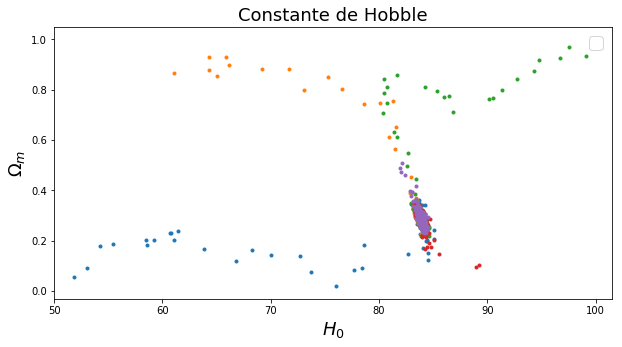

In [88]:
n=int(input('How many walkers do you want?: '))

P_ini=[[]for i in range(n)]
H=[[]for i  in range(n)]
omh=[[]for i in range(n)]

plt.figure(1)
plt.figure(figsize=(10,5))

for i in range(len(P_ini)):
    print('\n walker ',i+1)
    P_ini[i].append(float(input('initial parameter of $H_0$: ')))
    P_ini[i].append(float(input('initial parameter of $\sigma_{H_0$}$: ')))
    P_ini[i].append(float(input('initial parameter of $\Omega_0$: ')))
    P_ini[i].append(float(input('initial parameter of $\sigma_{\Omega_0}$: ')))
    lnlik(z,mu,var,P_ini[i])

    tbla1=np.loadtxt('Tabla_datos(2).dat')
    H[i]=tbla1[:,0]
    omh[i]=tbla1[:,1]
    plt.plot(H[i],omh[i],'.')
    
X=np.array(P_ini)
plt.xlim(np.amin(X[:,0]),)
plt.xlabel('$H_0$',fontsize = 18)
plt.ylabel('$\Omega_m$',fontsize = 18)
plt.title(r'Constante de Hobble', fontsize = 18)
plt.legend(fontsize = 18)
plt.plot(1)

No handles with labels found to put in legend.


[]

<Figure size 432x288 with 0 Axes>

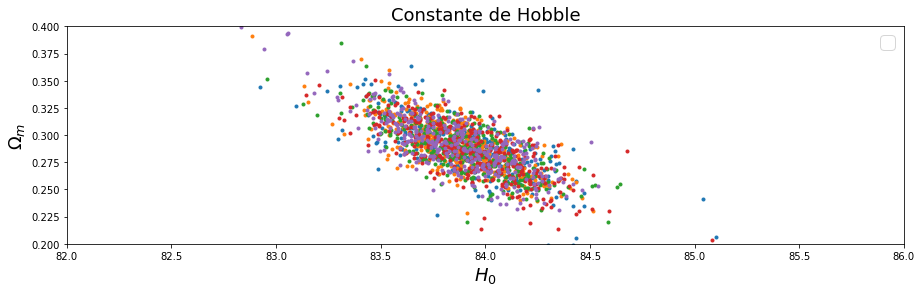

In [89]:
plt.figure(2)
plt.figure(figsize=(15,4))
plt.ylim(0.2,0.4)
plt.xlim(82,86)
plt.xlabel('$H_0$',fontsize = 18)
plt.ylabel('$\Omega_m$',fontsize = 18)
plt.title(r'Constante de Hobble', fontsize = 18)
plt.legend(fontsize = 18)
for i in range(len(P_ini)):
    plt.plot(H[i],omh[i],'.')
plt.plot()